### Task Description

In [1]:
'''
В цехе находятся 2 станка.
В цех поступают детали в среднем через каждые 35 минут (здесь и далее подразумевается, что все времена распределены экспоненциально). 
Обработка детали производится на одном из двух станков.
Первый обрабатывает деталь в среднем за 30 минут, при этом отвергает 10 % деталей, считая их бракованными.
Второй обрабатывает деталь в среднем за 50 минут, при этом отвергает 20 % деталей, считая их бракованными.
Если деталь была забракована в первый раз, то ее попробуют обработать еще раз после всех деталей, стоящих в очереди (будь то в очереди на первичную или вторичную обработку)
Детали, которые были отвергнуты 2 раза, считаются отходами и не обслуживаются цехом.
Детали, которые были отвергнуты на любом станке передаются на повторную обработку на второй станок. 
Моделирование проводится на 500 деталей.
'''
;

''

In [2]:
'''
Каждый из станков имеет цену обработки (или попытки обработки) детали. 
Для первого станка цена обработки составляет 5$. Для второго - 2$.
Цена готового изделия составляет 12 долларов.

Предпринимателю, который владеет цехом, поступило предложение об обмене второго станка. Новый станок имеет цену обработки в 3 $. Время обработки - 40 минут в среднем. Вероятность браковки - 10%.

Задача: выяснить какой из станков (старый 2-й или новый) будет более выгодный?
а) прибыль
б) прибыль \ сек
'''
;

''

In [3]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Variables

In [4]:
# constants
n = 500
price_for_item = 12 # $

work_price_first_machine = 5 # $
work_price_second_machine = 2 # $
work_price_third_machine = 3 # $

decline_first_machine = 10 # %
decline_second_machine = 20 # %
decline_third_machine = 10 # %

arrival_rate = 35 # min
first_machine_speed = 30 # min
second_machine_speed = 50 # min
third_machine_speed = 40 # min

first_reject_amount = 0
first_success_amount = 0
second_reject_amount = 0
second_success_amount = 0

garbage_amount = 0
finished_amount = 0
repeat_amount = 0

# simulation variables
x = list(range(n))
current_time = 0
first_machine_time = 0
second_machine_time = 0

# collections of elements
customers_time_copy = []
customers_status_copy = []

customers_time = [] # arrive times distributed exponentially will be stored here
customers_status = [] # str variable for each

### Arrival times generation

In [5]:
def get_random_arrival_time():
    return round(random.expovariate(1.0/arrival_rate))

In [6]:
def get_service_time_value(service_rate):
    return round(random.expovariate(1.0 / service_rate))

Array of times between arrivals:
[106, 27, 43, 124, 124, 22, 39, 18, 11, 3, 20, 67, 67, 47, 43, 43, 6, 52, 9, 19, 9, 1, 4, 32, 92, 15, 42, 69, 3, 47, 13, 13, 40, 10, 4, 28, 77, 0, 98, 83, 25, 9, 54, 44, 19, 15, 10, 50, 36, 48, 5, 39, 20, 7, 17, 51, 45, 12, 107, 7, 18, 26, 37, 15, 42, 13, 12, 10, 10, 32, 44, 33, 124, 14, 24, 16, 12, 5, 75, 5, 27, 19, 133, 35, 2, 33, 58, 3, 101, 48, 43, 21, 17, 9, 2, 1, 104, 50, 39, 32, 10, 60, 4, 120, 1, 167, 27, 84, 14, 16, 47, 64, 0, 11, 2, 38, 20, 92, 24, 21, 28, 39, 3, 24, 22, 35, 2, 2, 9, 53, 54, 24, 103, 46, 12, 1, 12, 2, 82, 58, 19, 52, 98, 4, 30, 26, 26, 18, 13, 24, 23, 16, 3, 40, 21, 4, 43, 8, 30, 8, 7, 7, 15, 16, 3, 90, 3, 126, 65, 5, 6, 18, 3, 8, 25, 25, 36, 27, 0, 45, 6, 4, 14, 16, 10, 59, 26, 17, 36, 8, 4, 19, 3, 13, 6, 93, 1, 8, 24, 8, 14, 7, 4, 42, 46, 18, 72, 72, 96, 3, 17, 64, 48, 1, 21, 108, 5, 0, 28, 23, 10, 0, 76, 44, 59, 22, 41, 12, 30, 156, 9, 7, 103, 19, 1, 6, 91, 61, 18, 111, 7, 5, 75, 62, 3, 22, 96, 28, 27, 38, 3, 5, 3, 39, 49, 

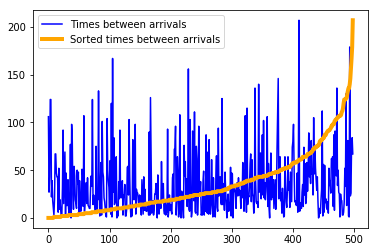

In [7]:
customers_time = []

def through_time_generation():
    curr_time = 0
    waiting_time = 0

    for i in x:
        waiting_time = get_random_arrival_time()
        customers_time.append(curr_time + waiting_time)
        curr_time += waiting_time

## this works incorrectly
## because sometimes time is going in other direction
def through_const_generation():
    value = 0
    
    for i in x:
        value = get_random_arrival_time()
        customers_time.append(i * arrival_rate + value)

## HERE I'M CALLING FUNCTION
## THAT IS WORKING IN THIS WAY:
## every iteration generating exp-distributed value with rate=35 (lambda = 1/rate)
## and curr_time_{i} has sum of all generated waiting_times (on previous row) till i-th iteration 

through_time_generation()
#through_const_generation()

between_arrival_times = []
for i in range(1, n):
    between_arrival_times.append(customers_time[i] - customers_time[i-1])

print('Array of times between arrivals:')
print(between_arrival_times)
print('\n\nE(x) of times between arrivals')
print(sum(between_arrival_times)/n)
    
fig, ax = plt.subplots()
ax.plot(range(n - 1), between_arrival_times, label = 'Times between arrivals', color='blue')

sorted_between_arrival_times = sorted(between_arrival_times)

ax.plot(range(n - 1), sorted_between_arrival_times, label = 'Sorted times between arrivals', linewidth= 4, color='orange')
ax.legend()
plt.show()

## Setup for other variables states

In [8]:
for i in x:
    customers_status.append('arrive')

## setting all initial times to status 'arrive'

## Functions Implementation

In [9]:
# choose machine
def number_of_machine_to_work_on():
    rnd = random.random()
    if (rnd < 0.5):
        #print('goes to machine #1 in experiment')
        return 1
    else:
        #print('goes to machine #2 in experiment')
        return 2

In [10]:
# returns true if machine doesn't decline item
def work_with_item(percentage_for_decline):
    r = random.random()
    
    if (r < percentage_for_decline / 100):
        return 0
    return 1

In [11]:
def first_machine():
    global current_time
    global first_success_amount
    global first_reject_amount
    global first_machine_time
    
    #print('current_time = ', current_time)
    #print('first_machine_time = ', first_machine_time)

    if (work_with_item(decline_first_machine)):
        first_success_amount += 1
        
        if (first_machine_time <= current_time):
            # work is done for this item
            first_machine_time = current_time + get_service_time_value(first_machine_speed)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            first_machine_time += get_service_time_value(first_machine_speed)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
    else:
        first_reject_amount += 1
        customers_time.append(first_machine_time)
        customers_status.append('repeat')

In [12]:
def second_machine(isRepeating):
    global current_time
    global second_success_amount
    global second_reject_amount
    global second_machine_time
    global garbage_amount
    
    #print('current_time = ', current_time)
    #print('second_machine_time = ', second_machine_time)
    
    if (work_with_item(decline_second_machine)):
        second_success_amount += 1
        
        if (second_machine_time <= current_time):
            # work is done for this item
            second_machine_time = current_time + get_service_time_value(second_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            second_machine_time += get_service_time_value(second_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
    else:
        if (isRepeating == 1):
            customers_time.append(second_machine_time)
            customers_status.append('garbage')
            return
        
        second_reject_amount += 1
        customers_time.append(second_machine_time)
        customers_status.append('repeat')

In [13]:
def third_machine(isRepeating):
    global current_time
    global second_success_amount
    global second_reject_amount
    global second_machine_time
    global garbage_amount
    
    #print('current_time = ', current_time)
    #print('second_machine_time = ', second_machine_time)
    
    if (work_with_item(decline_third_machine)):
        second_success_amount += 1
        
        if (second_machine_time <= current_time):
            # work is done for this item
            second_machine_time = current_time + get_service_time_value(third_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            second_machine_time += get_service_time_value(third_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
    else:
        if (isRepeating == 1):
            customers_time.append(second_machine_time)
            customers_status.append('garbage')
            return
        
        second_reject_amount += 1
        customers_time.append(second_machine_time)
        customers_status.append('repeat')

## Simulation with machine №2

In [14]:
i = 0 # current arrival that is supported

customers_time_copy = customers_time.copy()
customers_status_copy = customers_status.copy()

while (i < len(customers_time)):
    #print('Item # ', i)
    
    if (i < n):
        current_time = customers_time[i]
    
    # we have to synchronize 2-nd machine and current time
    #if (i == n):
        #print('amount of works done on 2nd machine before repeating:', second_success_amount + second_reject_amount)
        #print('first_machine_time = ', first_machine_time)
        #print('second_machine_time = ', second_machine_time)
        #print('current_time = ', current_time)
    
    # ARRIVALS
    if (customers_status[i] == 'arrive'):
        machine_number = number_of_machine_to_work_on()
        if (machine_number == 1):
            first_machine()
        if (machine_number == 2):
            second_machine(0)
    
    # FINISHED
    if (customers_status[i] == 'finished'):
        #print('finished')
        finished_amount += 1
        
    # REPEAT
    if (customers_status[i] == 'repeat'):
        #print('repeat')
        second_machine(1)
        repeat_amount += 1
    
    # GARBAGE
    if (customers_status[i] == 'garbage'):
        #print('garbage')
        garbage_amount += 1
        
    i += 1

## Results

In [15]:
current_time = second_machine_time

print('Rejects: first [', first_reject_amount, '], second [', second_reject_amount, ']')
print('Successes: first [', first_success_amount, '], second [', second_success_amount, ']')
print('Garbage items: ', garbage_amount)
print('Finishes: ', finished_amount)
print('Repeats: ', repeat_amount)

print('Time spent: ', current_time, 'seconds')

money_earned = price_for_item * (finished_amount)

money_spent = work_price_first_machine * (first_success_amount + first_reject_amount)
money_spent += work_price_second_machine * (second_success_amount + second_reject_amount)

profit = money_earned - money_spent

print('Money earned: ', money_earned, '$')
print('Money spent: ', money_spent, '$')

print('Profit money: ', profit, '$')
print('Profit($)\sec:', profit / current_time)

Rejects: first [ 27 ], second [ 50 ]
Successes: first [ 232 ], second [ 254 ]
Garbage items:  14
Finishes:  486
Repeats:  77
Time spent:  20741 seconds
Money earned:  5832 $
Money spent:  1903 $
Profit money:  3929 $
Profit($)\sec: 0.1894315606769201


## Simulation with machine №3

In [16]:
first_reject_amount = 0
first_success_amount = 0
second_reject_amount = 0
second_success_amount = 0

second_machine_time = 0
first_machine_time = 0

garbage_amount = 0
finished_amount = 0
repeat_amount = 0

current_time = 0

i = 0 # current arrival that is supported

customers_time = customers_time_copy
customers_status = customers_status_copy

while (i < len(customers_time)):
    #print('Item # ', i)
        
    if (i < n):
        current_time = customers_time[i]
    
    # we have to synchronize 2-nd machine and current time
    '''
    if (i == n):
        print('amount of works done on 2nd machine before repeating:', second_success_amount + second_reject_amount)
        print('first_machine_time = ', first_machine_time)
        print('second_machine_time = ', second_machine_time)
        print('current_time = ', current_time)
    '''
    
    # ARRIVALS
    if (customers_status[i] == 'arrive'):
        #print('arrive')
        machine_number = number_of_machine_to_work_on()
        if (machine_number == 1):
            first_machine()
        if (machine_number == 2):
            third_machine(0)
    
    # FINISHED
    if (customers_status[i] == 'finished'):
        #print('finished')
        finished_amount += 1
        
    # REPEAT
    if (customers_status[i] == 'repeat'):
        #print('repeat')
        third_machine(1)
        repeat_amount += 1
    
    # GARBAGE
    if (customers_status[i] == 'garbage'):
        #print('garbage')
        garbage_amount += 1
        
    i += 1

In [17]:
current_time = second_machine_time

print('Rejects: first [', first_reject_amount, '], second [', second_reject_amount, ']')
print('Successes: first [', first_success_amount, '], second [', second_success_amount, ']')
print('Garbage items: ', garbage_amount)
print('Finishes: ', finished_amount)
print('Repeats: ', repeat_amount)

print('Time spent: ', current_time, 'seconds')

money_earned = price_for_item * (finished_amount)

money_spent = work_price_first_machine * (first_success_amount + first_reject_amount)
money_spent += work_price_third_machine * (second_success_amount + second_reject_amount)

profit = money_earned - money_spent

print('Money earned: ', money_earned, '$')
print('Money spent: ', money_spent, '$')

print('Profit money: ', profit, '$')
print('Profit($)\sec:', profit / current_time)

Rejects: first [ 26 ], second [ 28 ]
Successes: first [ 238 ], second [ 254 ]
Garbage items:  8
Finishes:  492
Repeats:  54
Time spent:  19007 seconds
Money earned:  5904 $
Money spent:  2166 $
Profit money:  3738 $
Profit($)\sec: 0.19666438680486137
